# TFIDF Frequencies of 9-11 Words in The Simpsons

In [1]:
# Load in top 50 lists
%store -r commis_top50
%store -r bush_top50

In [2]:
# Search for common words in lists
for c in commis_top50:
    for b in bush_top50:
        if c == b:
            print(c)

american
united
one
new
al
us


In [3]:
# Import pandas for data frame
import pandas as pd

In [4]:
# Read in cleaned .csv file and convert to data frame
simpsons_script = pd.read_csv("simpsons_df_fixed.csv")['raw_text']
simpsons_script = simpsons_script.to_frame()
simpsons_script.head()

,raw_text
0,ooo careful homer
1,theres no time to be careful
2,were late
3,hushed voice sorry excuse us pardon me
4,simultaneously hey norman hows it going so yo...


In [5]:
# Combine lists
combo_list = list(bush_top50) + list(commis_top50)

In [6]:
# Import word tokenizer
from nltk import word_tokenize

In [7]:
# Define function for counting frequency of unigram (assuming line not tokenized)
def unigram_counter(line_to_count, word_list):
    # Tokenize
    line = word_tokenize(line_to_count)
    
    # Initialise counter
    count = 0
    
    # Iterate through list for word
    for i in range(len(line)):
        for j in range(len(word_list)):
            if line[i] == word_list[j]:
                #print(word_list[j])
                count += 1
    return count

In [8]:
# Create column of frequencies of top 50 words
simpsons_script['9/11 Words TFIDF Top 50'] = [unigram_counter(simpsons_script.iloc[i][0], combo_list) for i in range(len(simpsons_script))]

In [9]:
# Display in ascending order
simpsons_script.sort_values(['9/11 Words TFIDF Top 50'], ascending = False)

,raw_text,9/11 Words TFIDF Top 50
81205,i want you to overhype this story so much it ...,18
937,chants one of us one of us one of us one of us,16
27570,fight fight fight fight fight fight fight fig...,13
42126,i have a buck i have one dollar one dollar he...,10
80028,one slingshot one pack of cards baseball one ...,10
...,...,...
49574,into phone woo hoo hangs up marge they found ...,0
49573,in crowd dibs on the liver,0
49572,all right now lets get this carcass over to t...,0
49571,hiyo,0


In [10]:
# Obtain mean value for top 50 count
import statistics
statistics.mean(simpsons_script['9/11 Words TFIDF Top 50'])

0.33560918008962093

In [11]:
# Import package for displaying package
import matplotlib.pyplot as plt

In [12]:
# Import dictionary of line to year mapping
%store -r line_year

In [13]:
# Import package for converting vector to dictionary
import operator
from operator import itemgetter

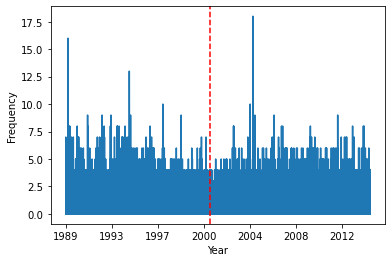

In [38]:
# Plot frequency over time
fig, ax = plt.subplots()

plt.plot(range(len(simpsons_script.index+1)), simpsons_script['9/11 Words TFIDF Top 50'])

plt.xlabel("Year")
ax.set_xticks((0,20000,40000,60000,80000,100000,120000))
ax.set_xticklabels(itemgetter(0,20000,40000,60000,80000,100000,120000)(line_year))

# Vertical line indicating 2001
plt.axvline(x = 62639, color = 'r', linestyle = '--')

plt.ylabel("Frequency")
plt.savefig('lines_911_tfidf_top50auto.eps')
plt.show()

In [39]:
# Import Top 25 from each
%store -r bush_top25
%store -r commis_top25

In [40]:
combo_list_top25 = list(bush_top25) + list(commis_top25)

In [41]:
# Create column of frequencies of top 25 words
simpsons_script['9/11 Words TFIDF Top 25'] = [unigram_counter(simpsons_script.iloc[i][0], combo_list_top25) for i in range(len(simpsons_script))]

In [42]:
# Display in ascending order
simpsons_script.sort_values(['9/11 Words TFIDF Top 25'], ascending = False)

,raw_text,9/11 Words TFIDF Top 50,9/11 Words TFIDF Top 25
937,chants one of us one of us one of us one of us,16,8
5416,now let me start by saying good for you son i...,7,7
1397,ladies and gentlemen boys and girls contrary ...,8,7
27872,hello americans paul harvey here did you know...,7,7
121898,bingo antique bayonets im talking world war o...,7,6
...,...,...,...
47081,lying weakly its my first day,1,0
47080,you did this how could you be so irresponsible,0,0
47079,success,0,0
47078,uh sir weve found the problem some idiot thre...,0,0


In [43]:
# Obtain mean value for top 25 count
statistics.mean(simpsons_script['9/11 Words TFIDF Top 25'])

0.15003936054256994

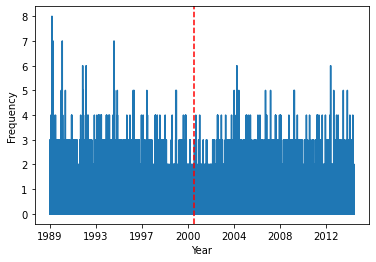

In [56]:
# Plot frequency over time
fig, ax = plt.subplots()

plt.plot(range(len(simpsons_script.index+1)), simpsons_script['9/11 Words TFIDF Top 25'])

plt.xlabel("Year")
ax.set_xticks((0,20000,40000,60000,80000,100000,120000))
ax.set_xticklabels(itemgetter(0,20000,40000,60000,80000,100000,120000)(line_year))

# Vertical line indicating 9/11
plt.axvline(x = 62639, color = 'r', linestyle = '--')

plt.ylabel("Frequency")
plt.savefig('lines_911_tfidf_top25auto.eps')
plt.show()

## Manually remove words from frequency list

In [45]:
# Define list of unwanted words (see report for details)
unwanted = ['applause','tonight','world','every','us','many','people','country',
'great','ask', 'come','together','seen','thank','may','one','strengthen','asking',
'want','new','forget','lives','end','known','center','flight','would','plane', 'minutes',
'first','told','time', 'call', 'white','house']

In [46]:
# Filter unwanted out of word list
manual_list_50 = []

for word in combo_list:
    if word not in unwanted:
        manual_list_50.append(word)

In [47]:
# Filter unwanted out of word list
manual_list_25 = []

for word in combo_list_top25:
    if word not in unwanted:
        manual_list_25.append(word)

In [48]:
# Create column of frequencies of top 50 manually cleaned words
simpsons_script['9/11 Words TFIDF Top 50 Manual'] = [unigram_counter(simpsons_script.iloc[i][0], manual_list_50) for i in range(len(simpsons_script))]

In [49]:
# Take average
statistics.mean(simpsons_script['9/11 Words TFIDF Top 50 Manual'])

0.023351398813128255

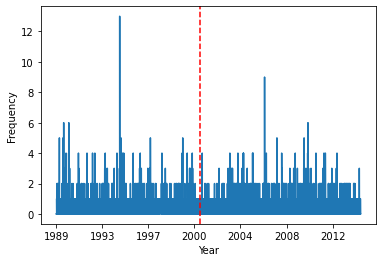

In [55]:
# Plot
fig, ax = plt.subplots()

plt.plot(range(len(simpsons_script.index+1)), simpsons_script['9/11 Words TFIDF Top 50 Manual'])

plt.xlabel("Year")
ax.set_xticks((0,20000,40000,60000,80000,100000,120000))
ax.set_xticklabels(itemgetter(0,20000,40000,60000,80000,100000,120000)(line_year))

# Vertical line indicating 9/11
plt.axvline(x = 62639, color = 'r', linestyle = '--')

plt.ylabel("Frequency")
plt.savefig('lines_911_tfidf_top50manual.eps')
plt.show()

In [51]:
# Create column of frequencies of top 25 manually cleaned words
simpsons_script['9/11 Words TFIDF Top 25 Manual'] = [unigram_counter(simpsons_script.iloc[i][0], manual_list_25) for i in range(len(simpsons_script))]

In [52]:
# Take average
statistics.mean(simpsons_script['9/11 Words TFIDF Top 25 Manual'])

0.015138670219207945

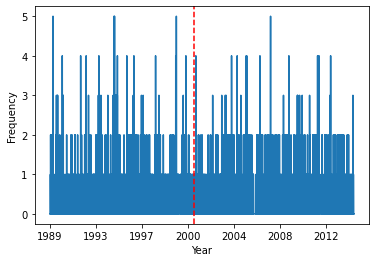

In [54]:
# Plot
fig, ax = plt.subplots()

plt.plot(range(len(simpsons_script.index+1)), simpsons_script['9/11 Words TFIDF Top 25 Manual'])

plt.xlabel("Year")
ax.set_xticks((0,20000,40000,60000,80000,100000,120000))
ax.set_xticklabels(itemgetter(0,20000,40000,60000,80000,100000,120000)(line_year))

# Vertical line indicating 9/11
plt.axvline(x = 62639, color = 'r', linestyle = '--')

plt.ylabel("Frequency")
plt.savefig('lines_911_tfidf_top25manual.eps')
plt.show()